# Reservation Radar: A Cancellation Classifier for Hotel Booking Prediction using ML

### Problem Statement:

Company Name: Hotel Company

Problem Type: Classification (Binary)

Problem: The online hotel reservation channels have dramatically changed booking possibilities and customers’ behavior.
    
A significant number of hotel reservations are called-off due to cancellations or no-shows.
The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with.

Goal: We need to determine if each customer is likely to cancel their reservation or not.

These details (features we will use to predict) are as follows:

Booking_ID: unique identifier of each booking

no_of_adults: Number of adults

no_of_children: Number of Children

no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

type_of_meal_plan: Type of meal plan booked by the customer

required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)

room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.

lead_time: Number of days between the date of booking and the arrival date

arrival_year: Year of arrival date

arrival_month: Month of arrival date

arrival_date: Date of the month

market_segment_type: Market segment designation.

repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)

no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking

no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking

avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)

no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)


Which will let us determine the target variable which is:

booking_status: Flag indicating if the booking was canceled or not.

## 1.1. Step 1: Importing Required Libraries

In [4]:
import sys
import subprocess

print("Note: If you get a cant find _C error, try simply restarting the notebook, otherwise you may need to manually ensure these are installed\n")

packages = [
    'numpy', 'pandas', 'psutil', 'joblib', 'deap', 'torch', 
    'sklearn', 'xgboost', 'catboost', 'lightgbm', 'plotly', 
    'IPython', 'sweetviz', 'tqdm', 'deap', 'seaborn', 
    'matplotlib'
]

for package in packages:
    try:
        __import__(package)
        print(f"'{package}' is already installed.")
    except ImportError:
        print(f"'{package}' not found, installing...")
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', package])

Note: If you get a cant find _C error, try simply restarting the notebook, otherwise you may need to manually ensure these are installed

'numpy' is already installed.
'pandas' is already installed.
'psutil' is already installed.
'joblib' is already installed.
'deap' is already installed.
'torch' is already installed.
'sklearn' is already installed.
'xgboost' is already installed.
'catboost' is already installed.
'lightgbm' is already installed.
'plotly' is already installed.
'IPython' is already installed.
'sweetviz' is already installed.
'tqdm' is already installed.
'deap' is already installed.
'seaborn' is already installed.
'matplotlib' is already installed.


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve,roc_auc_score,precision_score, recall_score

In [6]:
hr=pd.read_csv('Hotel Reservations.csv')
hr.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [7]:
hr.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [8]:
hr.shape

(36275, 19)

## 1.2. Data Cleaning

#### Check for null values

In [11]:
missing_data = hr.isnull().sum()
missing_data

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

#### Number of distinct values in each column

In [13]:
hr.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

In [14]:
cols1=['no_of_adults', 'no_of_children', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'market_segment_type', 'repeated_guest', 'booking_status']
d = {}

In [15]:
for c in cols1:
    d[c] = hr[c].unique()



## 1.3. Feature Engineering

#### Summary stats for each variable

In [18]:
cols = ['lead_time','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room','no_of_weekend_nights','no_of_week_nights']
summary = hr[cols].describe()
summary

,lead_time,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_weekend_nights,no_of_week_nights
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,85.232557,0.023349,0.153411,103.423539,0.810724,2.204300
std,85.930817,0.368331,1.754171,35.089424,0.870644,1.410905
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,80.300000,0.000000,1.000000
50%,57.000000,0.000000,0.000000,99.450000,1.000000,2.000000
75%,126.000000,0.000000,0.000000,120.000000,2.000000,3.000000
max,443.000000,13.000000,58.000000,540.000000,7.000000,17.000000


##### Average price per room cannot be zero so we remove those rows

In [20]:
hr=hr[hr['avg_price_per_room']>0]

#### Create box plots for specific columns

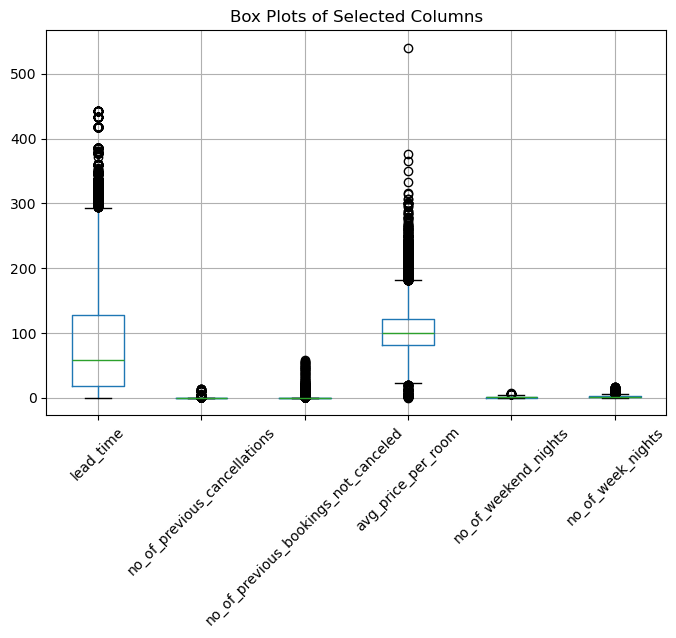

In [22]:
plt.figure(figsize=(8, 5))
hr[cols].boxplot()
plt.title('Box Plots of Selected Columns')
plt.xticks(rotation=45)
plt.show()

#### Handling Outliers

Looks like lead time, no of previous bookings not cancelled, average price per room have too many outliers

To deal with outliers, we follow these steps:
1. We write a function to count the number of outliers
2. We transform the data to handle outliers 
3. We gauge the effectiveness of the transformation by comparing the number of outliers before and after the transformation

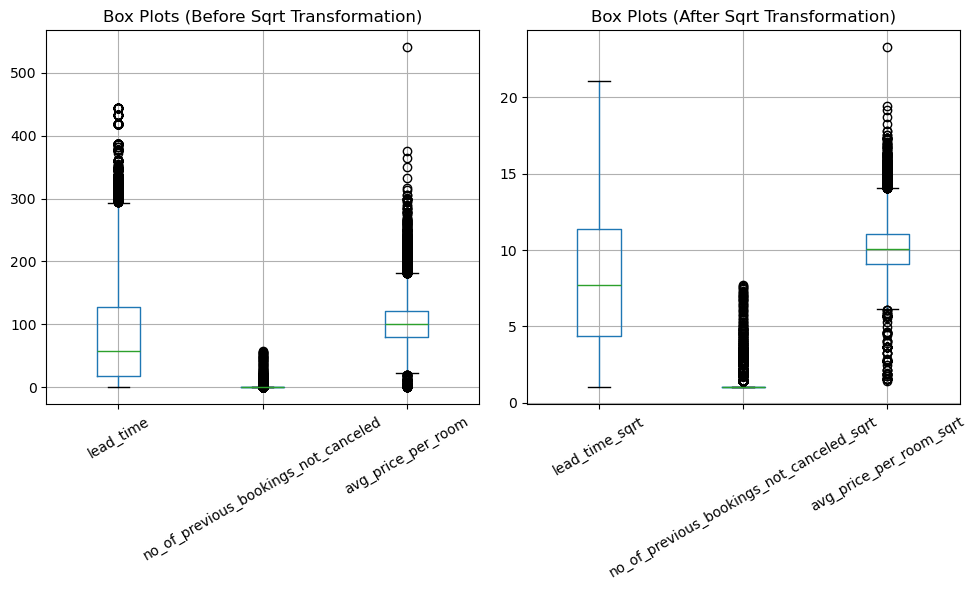

Number of Outliers (Before Sqrt Transformation):
lead_time                               1184
no_of_previous_bookings_not_canceled     690
avg_price_per_room                      1101
dtype: int64

Number of Outliers (After Sqrt Transformation):
lead_time_sqrt                                 0
no_of_previous_bookings_not_canceled_sqrt    690
avg_price_per_room_sqrt                      711
dtype: int64


In [25]:
# Selecting Columns with outliers
outlier_cols = ['lead_time', 'no_of_previous_bookings_not_canceled','avg_price_per_room']

# Function to count outliers using IQR method (Interquartile Range)
def count_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)].count()

# Count outliers before sqrt transformation
outliers_before = hr[outlier_cols].apply(count_outliers)

# Apply sqrt transformation with an offset to each column
for col in outlier_cols:
    offset = hr[col].min() + 1 # Adding 1 or a small positive value to handle zeros
    hr[f'{col}_sqrt'] = np.sqrt(hr[col] + offset)

# Count outliers after sqrt transformation
outliers_after = hr[[f'{col}_sqrt' for col in outlier_cols]].apply(count_outliers)

# Plot box plots before and after sqrt transformation
plt.figure(figsize=(10, 6))

# Before sqrt transformation
plt.subplot(1, 2, 1)
hr[outlier_cols].boxplot()
plt.title('Box Plots (Before Sqrt Transformation)')
plt.xticks(rotation=30)

# After sqrt transformation
plt.subplot(1, 2, 2)
hr[[f'{col}_sqrt' for col in outlier_cols]].boxplot()
plt.title('Box Plots (After Sqrt Transformation)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Display the number of outliers before and after transformation
print("Number of Outliers (Before Sqrt Transformation):")
print(outliers_before)
print("\nNumber of Outliers (After Sqrt Transformation):")
print(outliers_after)

Here the sqrt transformation worked to handle outliers from lead time but not the other variables, so we drop the sqrt columns for the other two variables

In [27]:
hr=hr.drop(columns=['no_of_previous_bookings_not_canceled_sqrt','avg_price_per_room_sqrt'],axis=1)

We now apply the logarithmic transformation to the remaining two variables

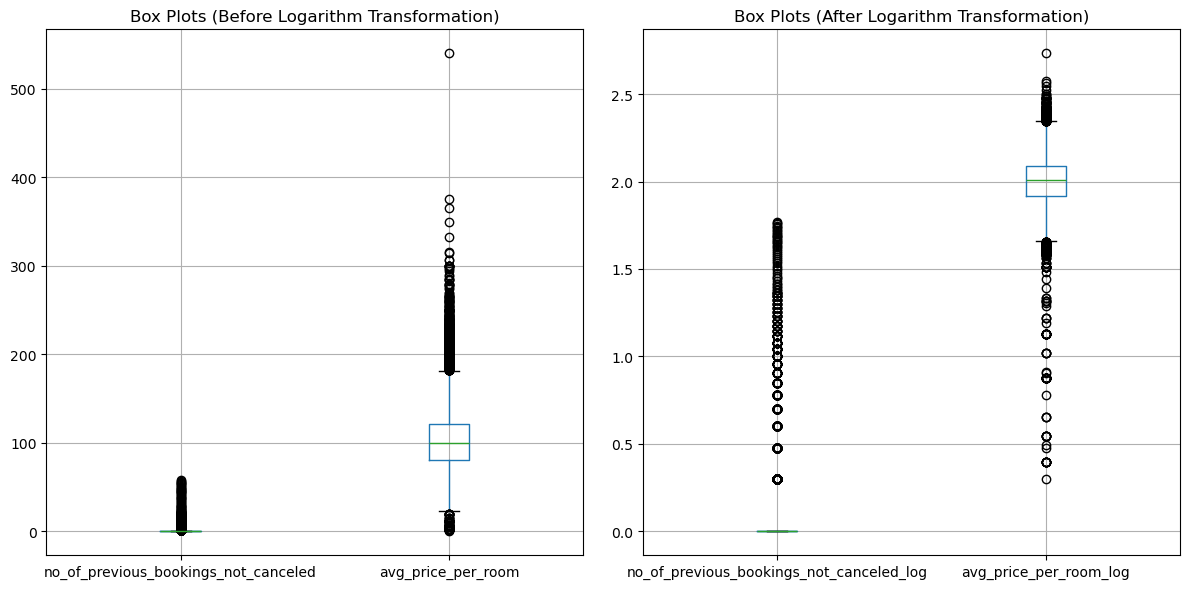

Number of Outliers (Before Logarithm Transformation):
no_of_previous_bookings_not_canceled     690
avg_price_per_room                      1101
dtype: int64

Number of Outliers (After Logarithm Transformation):
no_of_previous_bookings_not_canceled_log    690
avg_price_per_room_log                      451
dtype: int64


In [29]:
outlier_cols_1 = ['no_of_previous_bookings_not_canceled', 'avg_price_per_room']
outliers_before = hr[outlier_cols_1].apply(count_outliers)

# Apply logarithm transformation with an offset to each column
for col in outlier_cols_1:
    offset = hr[col].min() + 1 # Add 1 or a small positive value to handle zeros
    hr[f'{col}_log'] = np.log10(hr[col] + offset)

# Count outliers after logarithm transformation
outliers_after = hr[[f'{col}_log' for col in outlier_cols_1]].apply(count_outliers)

# Plot box plots before and after logarithm transformation
plt.figure(figsize=(12, 6))

# Before logarithm transformation
plt.subplot(1, 2, 1)
hr[outlier_cols_1].boxplot()
plt.title('Box Plots (Before Logarithm Transformation)')

# After logarithm transformation
plt.subplot(1, 2, 2)
hr[[f'{col}_log' for col in outlier_cols_1]].boxplot()
plt.title('Box Plots (After Logarithm Transformation)')
plt.tight_layout()
plt.show()

# Display the number of outliers before and after transformation
print("Number of Outliers (Before Logarithm Transformation):")
print(outliers_before)

print("\nNumber of Outliers (After Logarithm Transformation):")
print(outliers_after)

The log transformation significantly reduced the outliers for avg_price_per_room_log by ~60%
but did not help with no_of_previous_bookings_not_canceled

In [31]:
# Not removing the original avg_price_per_room variable because we need it for EDA
hr=hr.drop(columns=['no_of_previous_bookings_not_canceled_log'],axis=1)

To further understand no_of_previous_bookings_not_canceled, we plot its histogram

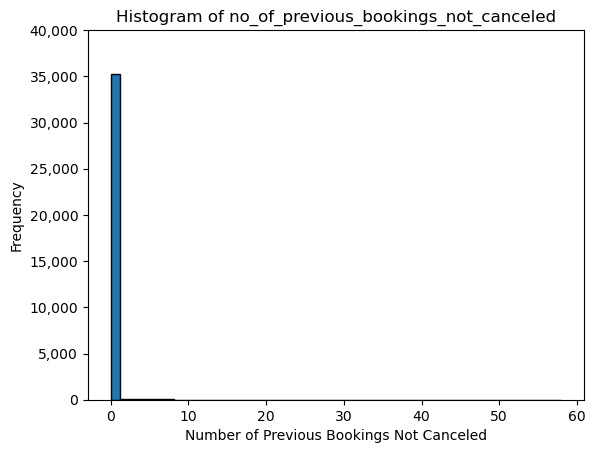

In [33]:
# Plot histogram for 'no_of_previous_bookings_not_canceled'
plt.hist(hr['no_of_previous_bookings_not_canceled'], bins=50, edgecolor='black')
plt.xlabel('Number of Previous Bookings Not Canceled')
plt.ylabel('Frequency')
plt.title('Histogram of no_of_previous_bookings_not_canceled')

# Get current y-axis ticks and labels
yticks, ylabels = plt.yticks()

# Increase the spacing between y-axis ticks and labels
plt.yticks(yticks, [f'{int(y):,}' for y in yticks])
plt.show()

Even though none of our transformations were effective in handling the outliers in
no_of_previous_bookings_not_canceled, we choose not remove the outliers for this variable because we might be losing valuable data

Now we move on to checking if the data is imbalanced In case of imbalanced data, we need to apply
techniques like SMOTE, etc. to correct the imbalance before running the model


In [35]:
# Check the class distribution for the 'booking_status' column
booking_status_counts = hr['booking_status'].value_counts()

# Calculate the percentage of each class
total_bookings = len(hr)
class_proportions = booking_status_counts / total_bookings * 100

# Print class distribution
print("Class Distribution:")
print(booking_status_counts)
print("\nClass Proportions (%):")
print(class_proportions)

Class Distribution:
booking_status
Not_Canceled    23851
Canceled        11879
Name: count, dtype: int64

Class Proportions (%):
booking_status
Not_Canceled    66.753428
Canceled        33.246572
Name: count, dtype: float64


The data shows a healthy balance and thus, there is no need for synthetic over-sampling

We combine the date columns and convert to datetime We need this so we can track bookings over
time for EDA We also remove rows with invalid dates e.g., February 29 in non-leap years)

In [38]:
# Remove rows with invalid dates
hr = hr[~((hr['arrival_month'] == 2) & (hr['arrival_date'] == 29) & ~(hr['arrival_year'] % 4 == 0))]

# Combine 'arrival_year', 'arrival_month', and 'arrival_date' with a custom separator
hr['arrival_date_combined'] = hr['arrival_year'].astype(str) + '-' + hr['arrival_month'].astype(str) + '-' + hr['arrival_date'].astype(str)

# Convert the concatenated date column to a datetime object
hr['arrival_date_combined'] = pd.to_datetime(hr['arrival_date_combined'])

# Drop the original 'arrival_date', 'arrival_month', and 'arrival_year' columns
hr.drop(['arrival_date', 'arrival_month', 'arrival_year'], axis=1, inplace=True)

Convert ‘booking_status’ into dummy variables

In [40]:
hr=pd.get_dummies(hr,columns=['booking_status'],drop_first=False)
hr=hr.drop('booking_status_Not_Canceled', axis=1)

We cannot use the dates as is for features and need to extract day, week, quarter, etc. from it

In [42]:
 def feature_engineering_dates(df):
     df['year'] = df['arrival_date_combined'].dt.year
     df['month'] = df['arrival_date_combined'].dt.month
     df['day'] = df['arrival_date_combined'].dt.day
     df['week'] = df['arrival_date_combined'].dt.isocalendar().week.astype(float)
     df['dayofweek'] = df['arrival_date_combined'].dt.dayofweek
     df['quarter'] = df['arrival_date_combined'].dt.quarter
     df['dayofyear'] = df['arrival_date_combined'].dt.dayofyear
     
     return df
     
 # Call the function to create date-related features
 hr = feature_engineering_dates(hr)

## 1.4. Exploratory Data Analysis

Let’s look at the distribution of Bookings and Cancellations over time

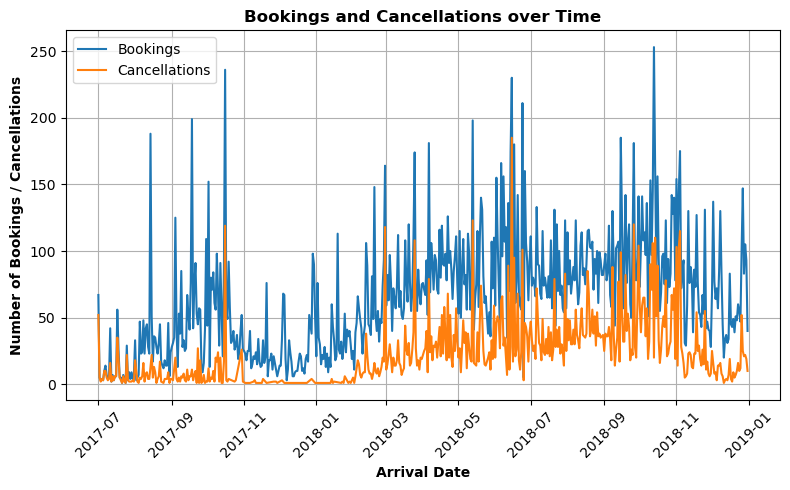

In [45]:
# Group the data by arrival dates and count the total bookings for each date
bookings_by_date = hr.groupby('arrival_date_combined').size()

# Group the data by arrival dates and count the cancellations for each date
cancellations_by_date = hr[hr['booking_status_Canceled'] == 1].groupby('arrival_date_combined').size()

# Plot the distribution of bookings and cancellations over time
plt.figure(figsize=(8, 5))
plt.plot(bookings_by_date.index, bookings_by_date.values, label='Bookings')
plt.plot(cancellations_by_date.index, cancellations_by_date.values, label='Cancellations')
plt.xlabel('Arrival Date', fontdict={'weight': 'bold'})
plt.ylabel('Number of Bookings / Cancellations', fontdict={'weight': 'bold'})
plt.title('Bookings and Cancellations over Time', fontdict={'weight': 'bold','size': 12})
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout() # Add some space between title and plot
plt.show()

Looks like there are mostly bulk bookings and cancellations

Let's Look at the average price of each type of room

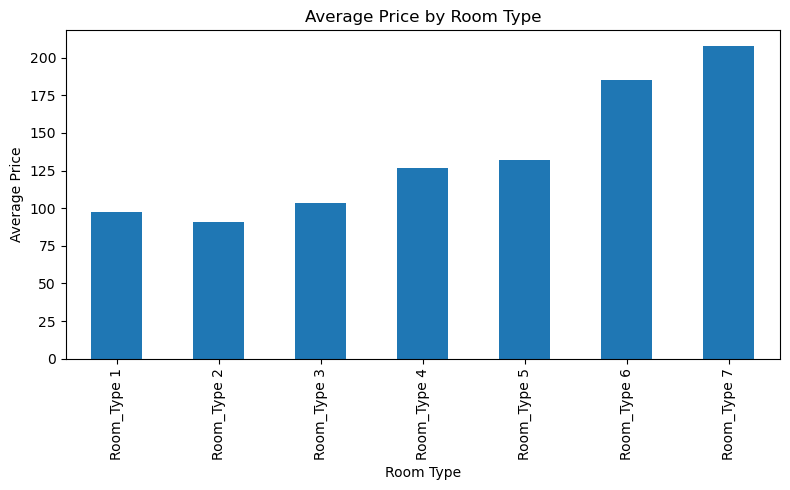

In [47]:
# Group data by 'room_type_reserved' and calculate average price for each group
average_price_by_room_type = hr.groupby('room_type_reserved')['avg_price_per_room'].mean()

# Plot the data
plt.figure(figsize=(8, 5))
average_price_by_room_type.plot(kind='bar')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.title('Average Price by Room Type')
plt.tight_layout()
plt.show()

Here Looks like Room Type 1 is the cheapest and Room Type 7 is the most expensive

##### What is the profile of the guests making the reservations?

In [50]:
# List of profile features to analyze
profile_features = ['type_of_meal_plan', 'room_type_reserved','market_segment_type',
'no_of_adults', 'no_of_children', 'repeated_guest','no_of_special_requests','required_car_parking_space',
'year','month','day','week','dayofweek','quarter']

# Create a function to display table for each profile feature
def display_tables(feature):
    cancellation_counts = hr.groupby([feature, 'booking_status_Canceled']).size().unstack()

# Calculate percentages
    cancellation_counts['Total'] = cancellation_counts.sum(axis=1)
    cancellation_counts['Not Canceled %'] = ((cancellation_counts[0] /cancellation_counts['Total'])*100).round(0)
    cancellation_counts['Canceled %'] = ((cancellation_counts[1] /cancellation_counts['Total'])*100).round(0)

# Display table
    print(f"Table for {feature}:\n")
    print(cancellation_counts)

# Display table for each profile feature
for feature in profile_features:
    display_tables(feature)
    print("\n")

Table for type_of_meal_plan:

booking_status_Canceled    False    True    Total  Not Canceled %  Canceled %
type_of_meal_plan                                                            
Meal Plan 1              18683.0  8669.0  27352.0            68.0        32.0
Meal Plan 2               1739.0  1504.0   3243.0            54.0        46.0
Meal Plan 3                  NaN     1.0      1.0             NaN       100.0
Not Selected              3399.0  1698.0   5097.0            67.0        33.0


Table for room_type_reserved:

booking_status_Canceled  False  True  Total  Not Canceled %  Canceled %
room_type_reserved                                                     
Room_Type 1              18657  9060  27717            67.0        33.0
Room_Type 2                439   228    667            66.0        34.0
Room_Type 3                  3     2      5            60.0        40.0
Room_Type 4               3924  2068   5992            65.0        35.0
Room_Type 5                174    72 

#### Insights:

• Almost no one chooses meal plan 3. It had one booking and that was cancelled.

• Coporate and Complementary bookings have the lowest cancellation rates

• Repeated guests have much lower cancellations, as do people with special requests and those who need parking

• Cancellation % has more than doubled from 2017 to 2018

• Cancellation % are the lowest in December and January

• Bookings go up consistently from the first to the third quarter

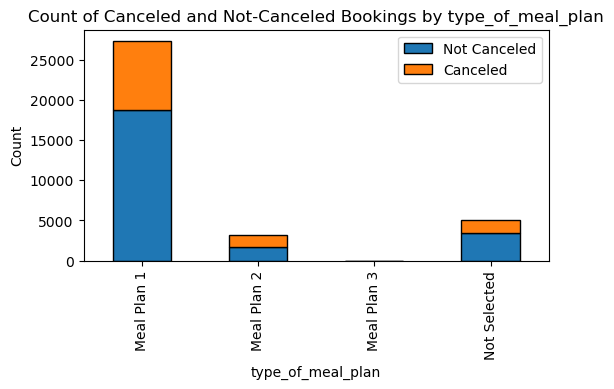

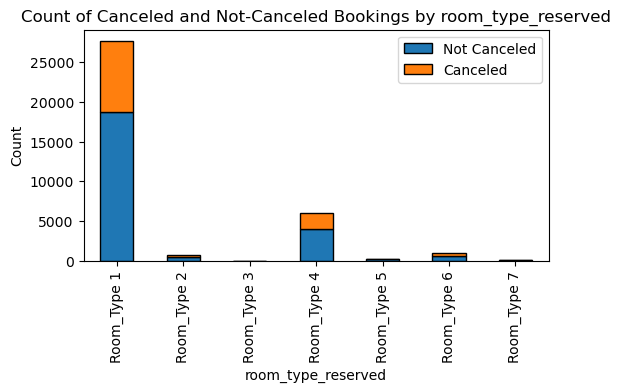

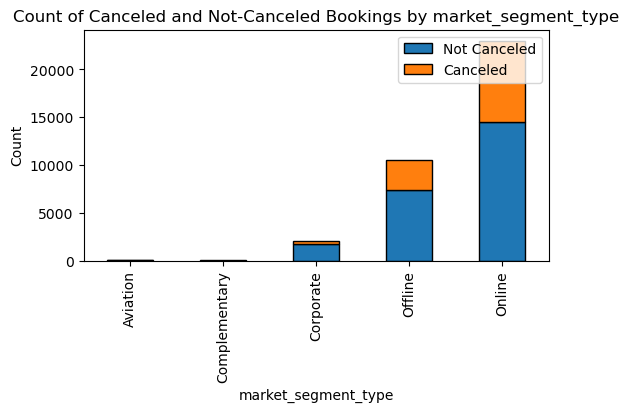

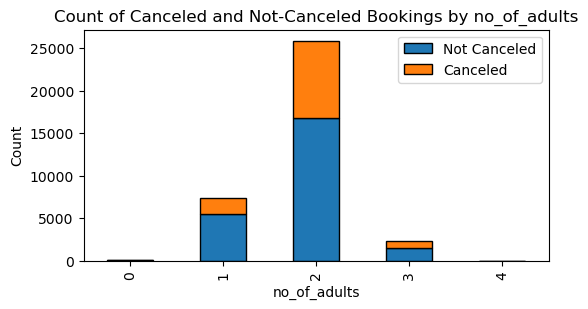

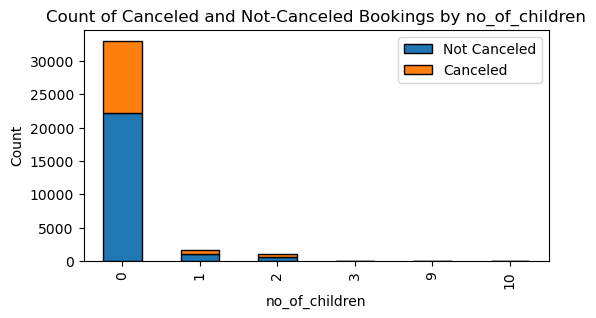

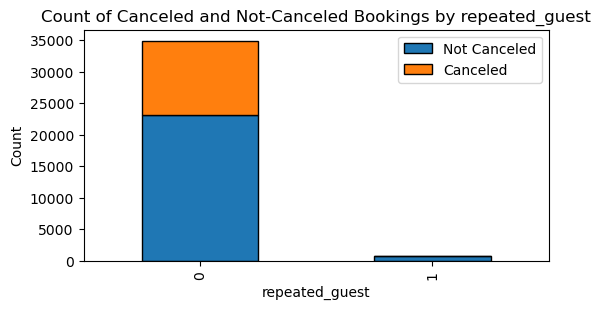

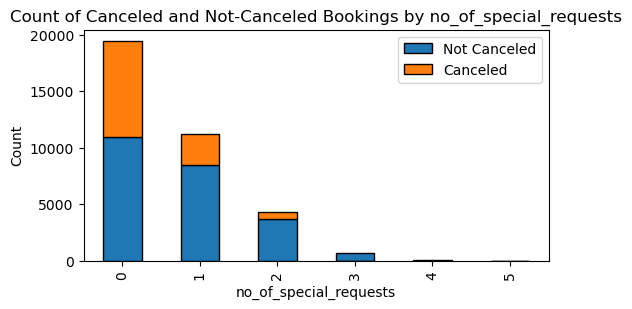

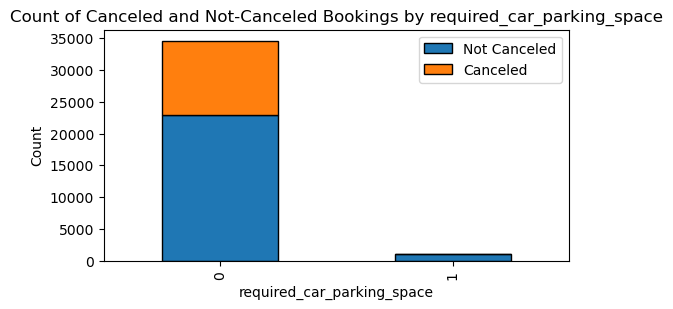

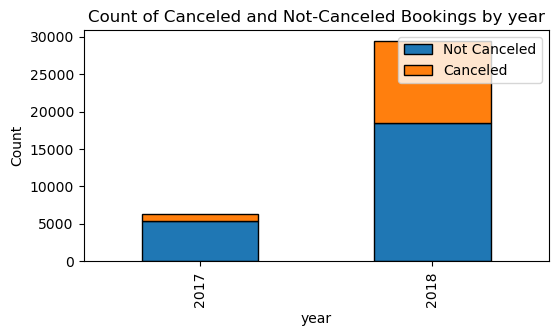

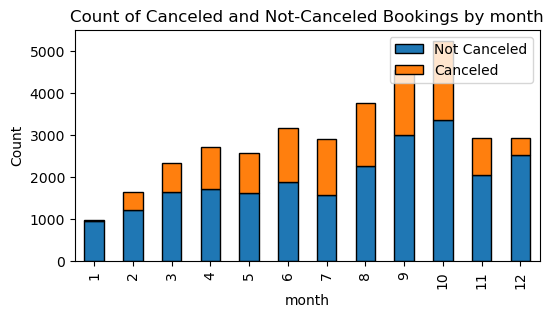

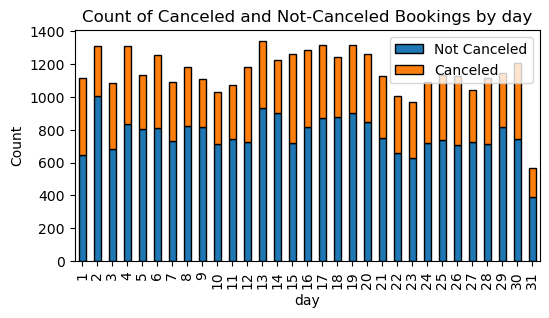

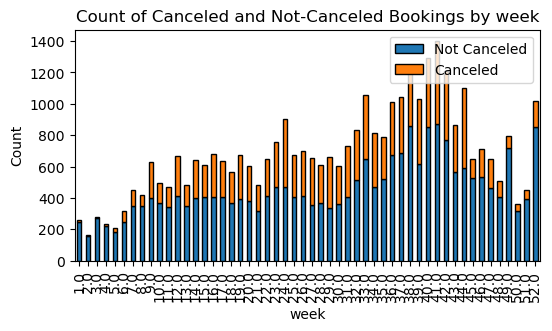

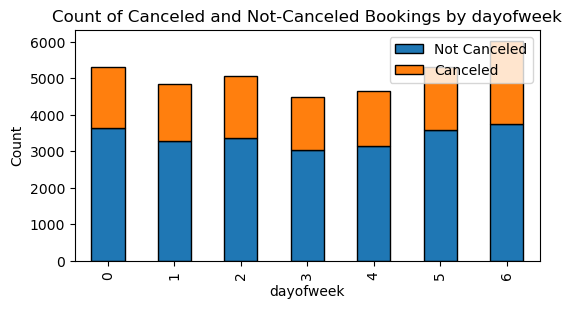

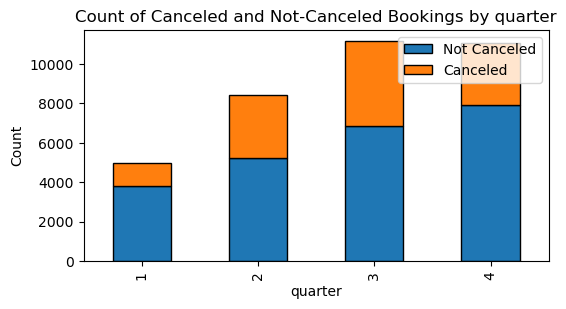

In [52]:
# Create a function to plot stacked bars
def plot_stacked_bars(feature):
    cancellation_counts = hr.groupby([feature, 'booking_status_Canceled']).size().unstack()
    cancellation_counts.plot(kind='bar', stacked=True, edgecolor='black',figsize=(6, 3))
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Count of Canceled and Not-Canceled Bookings by {feature}')
    plt.legend(['Not Canceled', 'Canceled'], loc='upper right')
    plt.show()

# Plot stacked bars for each profile feature
for feature in profile_features:
    plot_stacked_bars(feature)

#### Insights:
• Longer trips have lower cancellations - Longer trips tend to be more planned

• As we get closer to the trip, cancellations increase

• Cancellations are the lowest for very cheap and very expensive rooms

#### For the two room types with highest occupancy i.e. Room Types 1 and 4, plot the number of cancelled vs non cancelled bookings

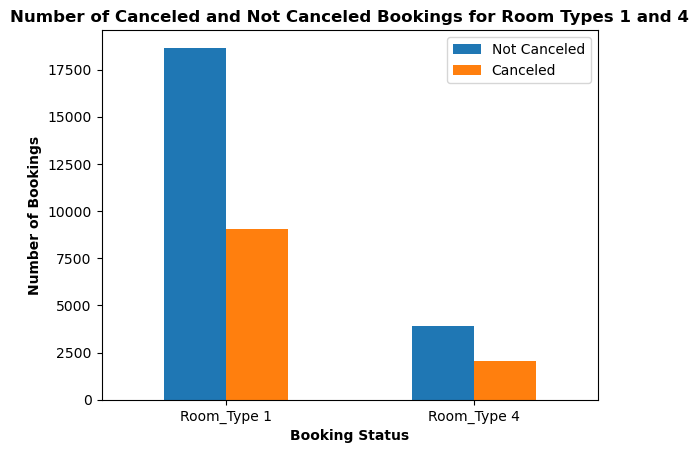

In [55]:
 # Filter the DataFrame based on room type 1 and 4
filtered_df = hr[hr['room_type_reserved'].isin(['Room_Type 1', 'Room_Type 4'])]

# Group the data by 'room_type_reserved' and 'booking_status_Canceled', and calculate the counts
cancellation_counts = filtered_df.groupby(['room_type_reserved','booking_status_Canceled']).size().unstack()

# Plot the data
ax = cancellation_counts.plot(kind='bar')

# Configure the plot
ax.set_xlabel('Booking Status', fontdict={'weight': 'bold'})
ax.set_ylabel('Number of Bookings', fontdict={'weight': 'bold'})
ax.set_title('Number of Canceled and Not Canceled Bookings for Room Types 1 and 4', fontdict={'weight': 'bold', 'size': 12})
ax.set_xticklabels(['Room_Type 1', 'Room_Type 4'], rotation=0)
ax.legend(['Not Canceled', 'Canceled'])

# Show the plot
plt.show()

#### How much are First-Timers paying for rooms as compared to Loyal (or repeat) customers?

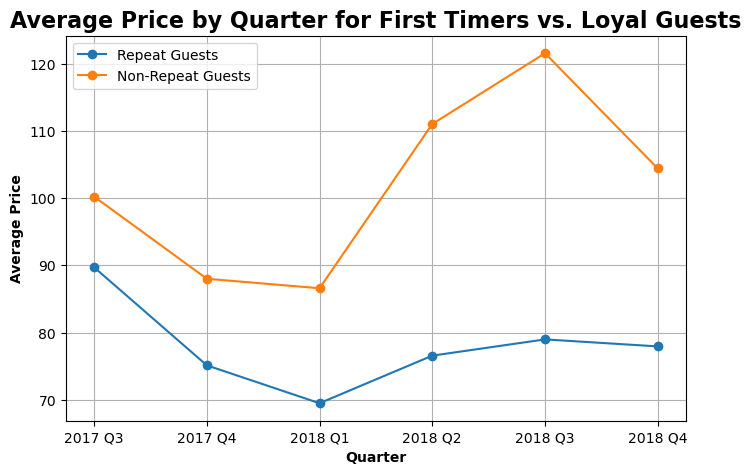

In [57]:
# Create a new column 'quarter_year' combining 'quarter' and 'year'
hr['quarter_year'] = hr['year'].astype(str) + ' Q' +hr['quarter'].astype(str)

# Separate repeat guests from non-repeat guests
repeat_guests = hr[hr['repeated_guest'] == 1]
non_repeat_guests = hr[hr['repeated_guest'] == 0]
repeat_guests_avg_price=repeat_guests.groupby('quarter_year')['avg_price_per_room'].mean()
non_repeat_guests_avg_price=non_repeat_guests.groupby('quarter_year')['avg_price_per_room'].mean()

# Plot the data
quarters = sorted(hr['quarter_year'].unique()) # Get unique quarters in␣ascending order
plt.figure(figsize=(8, 5))
plt.plot(quarters, repeat_guests_avg_price, marker='o', label='Repeat Guests')
plt.plot(quarters, non_repeat_guests_avg_price, marker='o', label='Non-Repeat Guests')
plt.xlabel('Quarter',fontdict={'weight': 'bold'})
plt.ylabel('Average Price',fontdict={'weight': 'bold'})
plt.title('Average Price by Quarter for First Timers vs. Loyal Guests',fontdict={'weight': 'bold', 'size': 16})
plt.legend()
plt.grid(True)
plt.show()

• The hotel is charging first timers a lot more than repeat guests

• This discourages them and may contribute to the higher cancellations for them

#### How has the average price of rooms evolved over time (split by bookings and cancellations)?

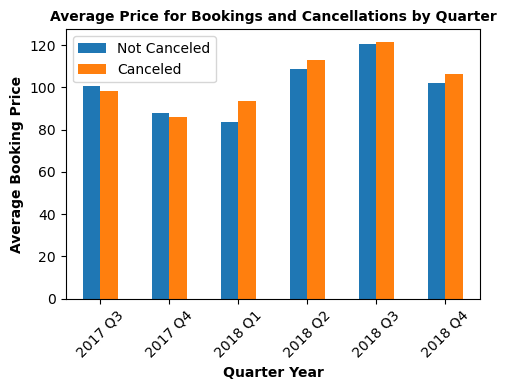

In [60]:
# Group the data by 'quarter_year' and 'booking_status_Canceled', and calculate the average booking price
avg_price_by_quarter = hr.groupby(['quarter_year','booking_status_Canceled'])['avg_price_per_room'].mean().unstack()

# Plot the data
fig, ax = plt.subplots(figsize=(5, 4)) # Adjust the figure size here (width,height)
avg_price_by_quarter.plot(kind='bar', ax=ax)

# Configure the plot
ax.set_xlabel('Quarter Year', fontdict={'weight': 'bold'})
ax.set_ylabel('Average Booking Price', fontdict={'weight': 'bold'})
ax.set_title('Average Price for Bookings and Cancellations by Quarter', fontdict={'weight': 'bold', 'size': 10})
ax.set_xticklabels(avg_price_by_quarter.index, rotation=45)
ax.legend(['Not Canceled', 'Canceled'])

# Show the plot
plt.tight_layout()
plt.show()

#### Were cancelled bookings more expensive than non-cancelled bookings?

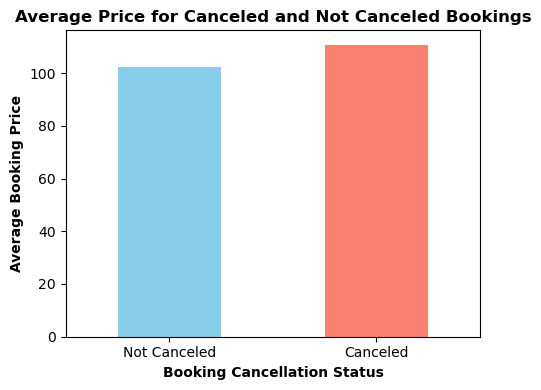

In [62]:
 # Group the data by 'booking_status_Canceled' and calculate the average booking price
avg_price_by_canceled = hr.groupby('booking_status_Canceled')['avg_price_per_room'].mean()

# Specify custom colors for the bars
colors = ['skyblue', 'salmon']

# Plot the data
fig, ax = plt.subplots(figsize=(5, 4)) # Adjust the figure size here (width,height)
avg_price_by_canceled.plot(kind='bar', ax=ax, color=colors)

# Configure the plot
ax.set_xlabel('Booking Cancellation Status', fontdict={'weight': 'bold'})
ax.set_ylabel('Average Booking Price', fontdict={'weight': 'bold'})
ax.set_title('Average Price for Canceled and Not Canceled Bookings',fontdict={'weight': 'bold', 'size': 12})
ax.set_xticklabels(['Not Canceled', 'Canceled'], rotation=0)

# Remove the line ax.legend(['Not Canceled', 'Canceled']) and let Matplotlib generate the legend automatically
# Show the plot
plt.tight_layout()
plt.show()

#### How has the mix of cancelled vs non-cancelled bookings evolved over time?

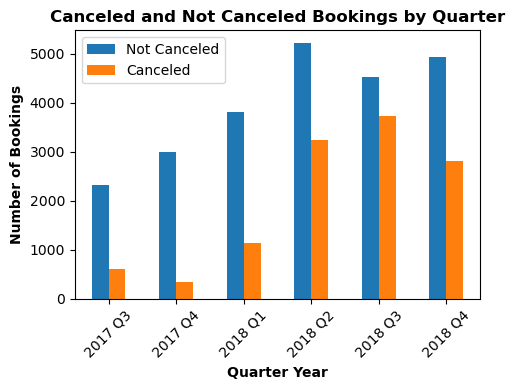

In [64]:
# Group the data by 'quarter_year' and 'booking_status_Canceled', and calculate the counts
cancellation_counts_by_quarter = hr.groupby(['quarter_year','booking_status_Canceled']).size().unstack()

# Plot the data
fig, ax = plt.subplots(figsize=(5, 4)) # Adjust the figure size here (width,height)
cancellation_counts_by_quarter.plot(kind='bar', ax=ax)

# Configure the plot
ax.set_xlabel('Quarter Year', fontdict={'weight': 'bold'})
ax.set_ylabel('Number of Bookings', fontdict={'weight': 'bold'})
ax.set_title('Canceled and Not Canceled Bookings by Quarter', fontdict={'weight': 'bold', 'size': 12})
ax.set_xticklabels(cancellation_counts_by_quarter.index, rotation=45)
ax.legend(['Not Canceled', 'Canceled'], loc='upper left')

# Show the plot
plt.tight_layout()

#### How much do average prices differ for people who ask for reserved parking vs those who do not?

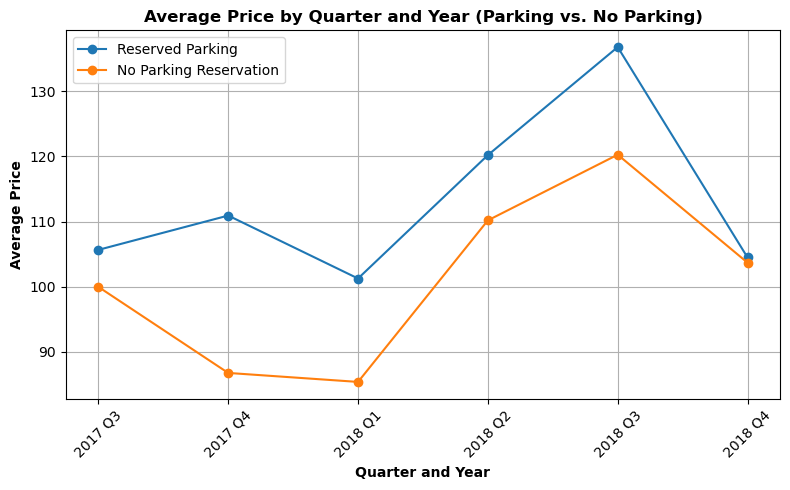

In [66]:
# Separate guests who reserved a parking spot from those who did not
reserved_parking = hr[hr['required_car_parking_space'] == 1]
no_parking_reservation = hr[hr['required_car_parking_space'] == 0]

# Group data by quarter_year and calculate average price for each group
reserved_parking_avg_price = reserved_parking.groupby('quarter_year')['avg_price_per_room'].mean()
no_parking_reservation_avg_price = no_parking_reservation.groupby('quarter_year')['avg_price_per_room'].mean()

# Plot the data
quarters_years = sorted(hr['quarter_year'].unique()) # Get unique␣quarters_years in ascending order
plt.figure(figsize=(8, 5))
plt.plot(quarters_years, reserved_parking_avg_price, marker='o',label='Reserved Parking')
plt.plot(quarters_years, no_parking_reservation_avg_price, marker='o',label='No Parking Reservation')
plt.xlabel('Quarter and Year',fontdict={'weight': 'bold','size': 10})
plt.ylabel('Average Price',fontdict={'weight': 'bold'})
plt.title('Average Price by Quarter and Year (Parking vs. No Parking)',fontdict={'weight': 'bold', 'size': 12})
plt.xticks(rotation=45) # Rotate x-axis labels for better visibility
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

• People who want reserved parking pay more on an average as expected

• But the gap has reduced over time and in Q4 2028, they converged

• This may be a response to their consistently high cancellation rates from the hotel

#### How do cancelled and non-cancelled bookings vary for various market segment over time?

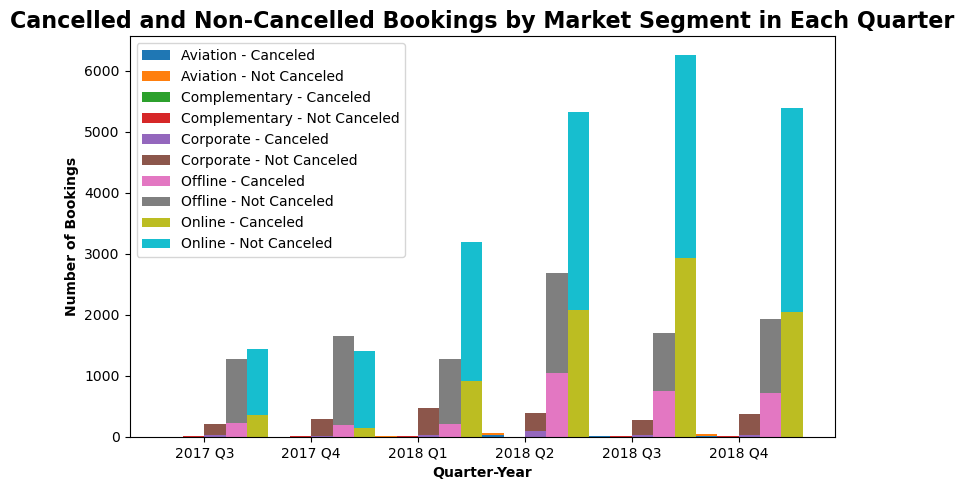

In [68]:
# Group the data by quarter and market segment
grouped_data = hr.groupby(['quarter_year', 'market_segment_type'])

# Count the number of canceled and not-canceled bookings for each group
cancelled_counts = grouped_data['booking_status_Canceled'].sum()
not_cancelled_counts = grouped_data['booking_status_Canceled'].count() - cancelled_counts

# Create a bar chart
quarters = sorted(hr['quarter_year'].unique())
market_segments = sorted(hr['market_segment_type'].unique())
width = 0.2 # Width of each bar
x = range(len(quarters))

# Plot the bars
fig, ax = plt.subplots(figsize=(8, 5))
for i, market_segment in enumerate(market_segments):
    canceled_vals = [cancelled_counts.get((quarter, market_segment), 0) for quarter in quarters]
    not_cancelled_vals = [not_cancelled_counts.get((quarter, market_segment), 0) for quarter in quarters]
    ax.bar([pos + i * width for pos in x], canceled_vals, width, label=f"{market_segment} - Canceled")
    ax.bar([pos + i * width for pos in x], not_cancelled_vals, width, bottom=canceled_vals, label=f"{market_segment} - Not Canceled")

ax.set_xticks([pos + 1.5 * width for pos in x])
ax.set_xticklabels(quarters)
ax.set_xlabel("Quarter-Year",fontdict={'weight': 'bold'})
ax.set_ylabel("Number of Bookings",fontdict={'weight': 'bold'})
ax.set_title("Cancelled and Non-Cancelled Bookings by Market Segment in Each Quarter",fontdict={'weight': 'bold', 'size': 16})
ax.legend()
plt.tight_layout()
plt.show()


• Online bookings have skyrocketed over time

• But close to half of them get cancelled

• Knowing this hotels can

#### Is there a trend in the number of special requests over time?

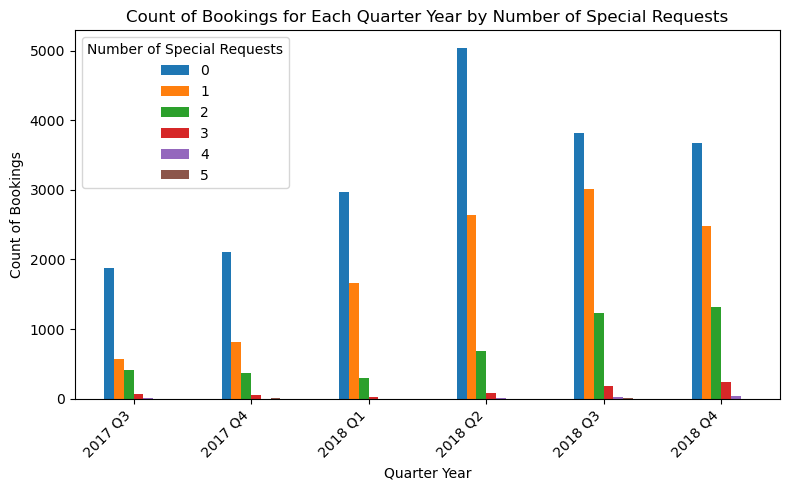

In [89]:
# Group by 'quarter_year' and 'no_of_special_requests', then calculate the count of bookings for each group
booking_counts = hr.groupby(['no_of_special_requests', 'quarter_year']).size().reset_index(name='count')

# Pivot the data to make 'no_of_special_requests' values as columns and 'quarter_year' as rows
pivot_hr = booking_counts.pivot(index='quarter_year', columns='no_of_special_requests', values='count')

# Plot the data using a bar plot
ax = pivot_hr.plot(kind='bar', figsize=(8, 5))
ax.set_xlabel('Quarter Year')
ax.set_ylabel('Count of Bookings')
ax.set_title('Count of Bookings for Each Quarter Year by Number of Special Requests')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Number of Special Requests')
plt.tight_layout()
plt.show()

We want to recommend a cancellation charge framework on the basis of lead time and find the projected amount that we can recoup from cancellations. For this analysis, we focus only on Room Type 1 as it has the highest occupancy rates. The steps are as follows :

• We split the lead time values into quartiles and the cancellation charge increases as we move closer to the check-in date

• When the lead time is in the fourth quartile, we charge 10% of booking amount for cancellation. For the third, second and first quartiles we charge 15%, 20% and 30% respectively

In [92]:
# Step 1: Calculate quartiles for lead_time
lead_time_quartiles = hr['lead_time'].quantile([0.25, 0.5, 0.75, 1.0])

def get_lead_time_quartile(lead_time):
    if lead_time >= lead_time_quartiles[0.75]:
        return 'Q4'
    elif lead_time >= lead_time_quartiles[0.5]:
        return 'Q3'
    elif lead_time >= lead_time_quartiles[0.25]:
        return 'Q2'
    else:
        return 'Q1'

hr['lead_time_quartile'] = hr['lead_time'].apply(get_lead_time_quartile)

# Step 3: Filter canceled bookings of Room_Type 1 (make a copy)
room_type_1_data = hr[(hr['room_type_reserved'] == 'Room_Type 1') & 
                      (hr['booking_status_Canceled'] == 1)].copy()

def calculate_cancellation_charge(row):
    avg_price = row['avg_price_per_room']
    q = row['lead_time_quartile']
    if q == 'Q4':
        return 0.10 * avg_price
    elif q == 'Q3':
        return 0.15 * avg_price
    elif q == 'Q2':
        return 0.20 * avg_price
    else:
        return 0.30 * avg_price

room_type_1_data['cancellation_charge'] = room_type_1_data.apply(calculate_cancellation_charge, axis=1)

# Print the updated DataFrame
room_type_1_data.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,...,year,month,day,week,dayofweek,quarter,dayofyear,quarter_year,lead_time_quartile,cancellation_charge
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,...,2018,2,28,9.0,2,1,59,2018 Q1,Q1,18.000
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,...,2018,5,20,20.0,6,2,140,2018 Q2,Q4,10.000
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,...,2018,4,11,15.0,2,2,101,2018 Q2,Q2,18.900
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,...,2018,9,13,37.0,3,3,256,2018 Q3,Q4,11.500
12,INN00013,2,0,2,1,Not Selected,0,Room_Type 1,30,Online,...,2018,11,26,48.0,0,4,330,2018 Q4,Q2,17.600
13,INN00014,1,0,2,0,Meal Plan 1,0,Room_Type 1,95,Online,...,2018,11,20,47.0,1,4,324,2018 Q4,Q3,13.500
15,INN00016,2,0,0,2,Meal Plan 2,0,Room_Type 1,256,Online,...,2018,6,15,24.0,4,2,166,2018 Q2,Q4,11.500
18,INN00019,2,0,2,2,Meal Plan 1,0,Room_Type 1,99,Online,...,2017,10,30,44.0,0,4,303,2017 Q4,Q3,9.750
20,INN00021,2,0,2,2,Meal Plan 1,0,Room_Type 1,99,Online,...,2017,10,30,44.0,0,4,303,2017 Q4,Q3,9.750
28,INN00029,1,0,1,2,Meal Plan 1,0,Room_Type 1,37,Online,...,2017,11,6,45.0,0,4,310,2017 Q4,Q2,7.466


In [94]:
# Group and aggregate data
result = room_type_1_data.groupby('lead_time_quartile').agg(
    total_cancellation_charge=pd.NamedAgg(column='cancellation_charge', aggfunc='sum'),
    total_cancellations=pd.NamedAgg(column='booking_status_Canceled', aggfunc='sum')
)

print(result)

                    total_cancellation_charge  total_cancellations
lead_time_quartile                                                
Q1                                  24003.297                  758
Q2                                  28173.876                 1329
Q3                                  31248.852                 2147
Q4                                  49298.945                 4826


• By implementing the cancellation charge scheme outlined earlier for Room Type 1, we can potentially recover around 133k euros, which accounts for about 15% of the total revenue lost due to cancellations.
    
• The cancellation charges can be adjusted incrementally to strike a balance. We need to finetune the charges until the point where it doesn’t negatively impact the number of bookings.

#### Correlation Matrix

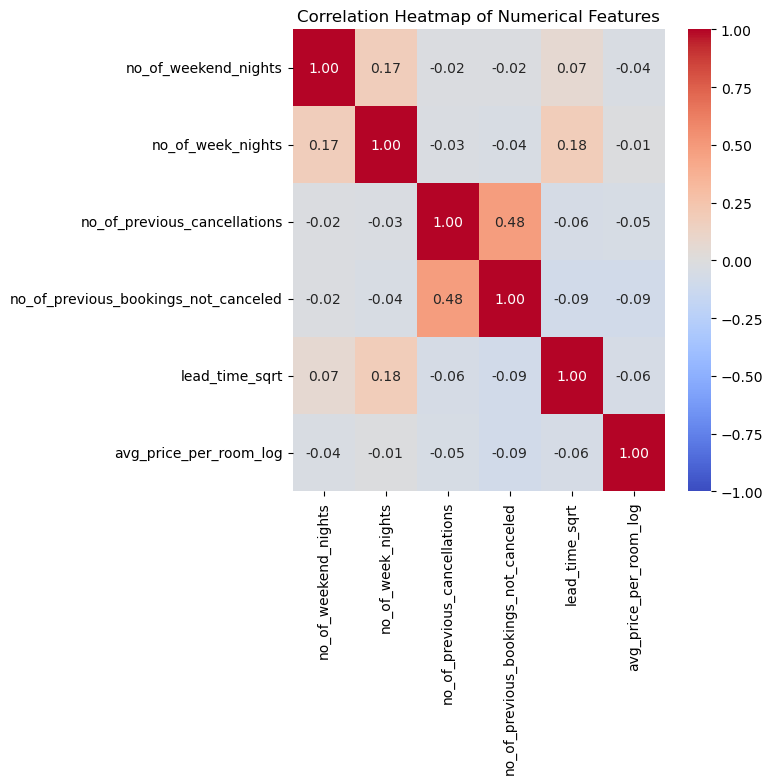

In [98]:
# Define the numerical features to analyze
numerical_features_new = ['no_of_weekend_nights', 'no_of_week_nights','no_of_previous_cancellations',
'no_of_previous_bookings_not_canceled','lead_time_sqrt', 'avg_price_per_room_log']

# Assuming you have a DataFrame 'hr' containing the booking data
correlation_matrix = hr[numerical_features_new].corr()

# Create the correlation heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### 1.4.1. Model

In [101]:
# Prep data further for model

# One hot encoding the other categorical variables
hr_encoded = pd.get_dummies(hr, columns=['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], drop_first=True, dtype=int)

# Drop unused or unneeded features
hr_encoded.drop(columns=[
    'arrival_date_combined', 
    'avg_price_per_room', 
    'lead_time', 
    'quarter_year'
], inplace=True)

In [103]:
if 'cancellation_charge' in hr.columns:
    hr = hr.drop(columns=['cancellation_charge'])

In [105]:
# Separate the target variable from the features
X = hr_encoded.drop(columns=['booking_status_Canceled','Booking_ID','lead_time_quartile'])
y = hr_encoded['booking_status_Canceled']

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,lead_time_sqrt,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
18348,2,0,2,4,0,0,0,0,0,9.110434,...,0,0,0,0,0,0,0,0,1,0
5193,2,0,0,1,0,0,0,0,0,13.490738,...,0,0,0,1,0,0,0,0,0,1
22960,1,0,1,2,0,0,0,0,1,2.645751,...,0,0,0,0,0,0,0,0,0,1
7032,2,0,2,1,0,0,0,0,2,3.872983,...,0,0,0,0,0,0,0,0,0,1
24063,1,0,0,1,0,0,0,0,0,1.000000,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17110,1,0,0,1,0,0,0,0,0,7.000000,...,0,0,0,0,0,0,0,0,1,0
6352,2,1,2,4,0,0,0,0,1,9.797959,...,0,0,1,0,0,0,0,0,0,1
11463,2,0,1,2,0,0,0,0,1,9.165151,...,0,0,0,0,0,0,0,0,0,1
874,2,0,0,2,0,0,0,0,0,8.366600,...,0,0,0,0,0,0,0,0,1,0


In [107]:
hr_encoded.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'no_of_special_requests', 'lead_time_sqrt', 'avg_price_per_room_log',
       'booking_status_Canceled', 'year', 'month', 'day', 'week', 'dayofweek',
       'quarter', 'dayofyear', 'lead_time_quartile',
       'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3',
       'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online'],
      dtype='object')

### 1.4.2. Logistic Regression

from sklearn.impute import SimpleImputerRFE, GridSearchCV, Model and Evaluation Metrics (Accuracy, Precision and Recall)

In [111]:
# Recursive Feature Elimination with Logistic Regression
logistic_model = LogisticRegression() # Choose the model you want to use for RFE
rfe_logistic = RFE(logistic_model, n_features_to_select=10) # Choose the desired number of features
fit_logistic = rfe_logistic.fit(X_train, y_train)

# Selected features
selected_features_logistic = X_train.columns[fit_logistic.support_]
print("Selected Features (Logistic Regression):", selected_features_logistic)

# GridSearchCV to find the best hyperparameters for Logistic Regression
param_grid_logistic = {
'penalty': ['l1', 'l2'],
'C': [0.01, 0.1, 1.0, 10.0]
}

logistic_model = LogisticRegression()
grid_search_logistic = GridSearchCV(logistic_model, param_grid_logistic, cv=5,n_jobs=-1)
grid_search_logistic.fit(X_train[selected_features_logistic], y_train)

# Best hyperparameters for Logistic Regression
best_params_logistic = grid_search_logistic.best_params_
print("Best Hyperparameters (Logistic Regression):", best_params_logistic)

# Train the Logistic Regression model with optimized hyperparameters
best_model_logistic = LogisticRegression(**best_params_logistic)
best_model_logistic.fit(X_train[selected_features_logistic], y_train)

# Evaluate the model on the test set
y_pred_logistic = best_model_logistic.predict(X_test[selected_features_logistic])

# Calculate accuracy, precision and recall
accuracy_logistic = best_model_logistic.score(X_test[selected_features_logistic], y_test)
print("Accuracy on Test Set (Logistic Regression):", accuracy_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
print("Precision:", precision_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
print("Recall:", recall_logistic)

C:\Users\poorn\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\poorn\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Selected Features (Logistic Regression): Index(['required_car_parking_space', 'repeated_guest',
       'no_of_special_requests', 'lead_time_sqrt', 'avg_price_per_room_log',
       'type_of_meal_plan_Not Selected', 'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online'],
      dtype='object')


C:\Users\poorn\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\poorn\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\poorn\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\poorn\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _

Best Hyperparameters (Logistic Regression): {'C': 1.0, 'penalty': 'l2'}
Accuracy on Test Set (Logistic Regression): 0.7996918335901386
Precision: 0.722249151720795
Recall: 0.6348530038346826


#### Confusion Matrix

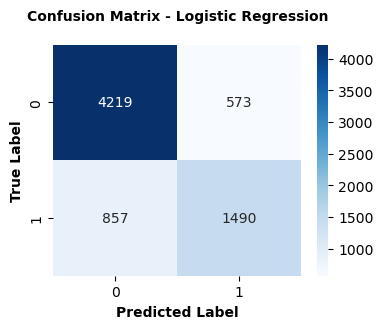

In [114]:
# Compute confusion matrix
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
# Plot confusion matrix as a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label',fontdict={'weight': 'bold'})
plt.ylabel('True Label',fontdict={'weight': 'bold'})
plt.title('Confusion Matrix - Logistic Regression\n',fontdict={'weight':'bold', 'size': 10})
plt.show()

#### ROC curve and ROC AUC Score

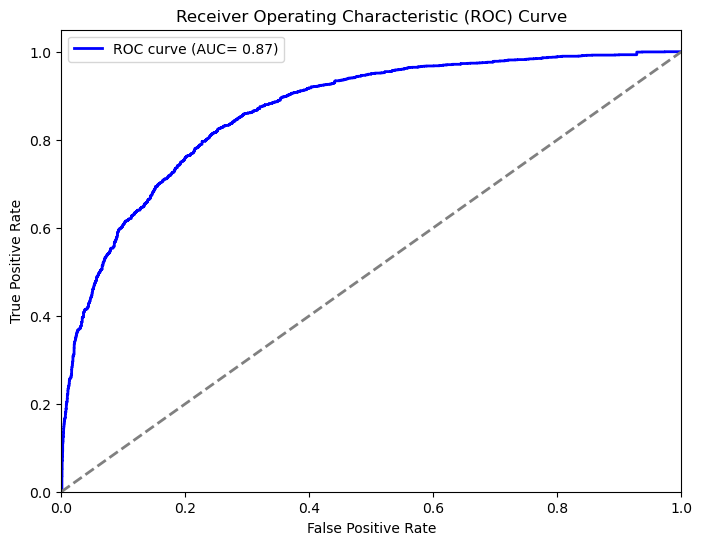

In [117]:
# Compute ROC curve and ROC AUC score
probs_logistic = best_model_logistic.predict_proba(X_test[selected_features_logistic])[:, 1]
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test,probs_logistic)
roc_auc_logistic = roc_auc_score(y_test, probs_logistic)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_logistic, tpr_logistic, color='blue', lw=2, label=f'ROC curve (AUC= {roc_auc_logistic:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='upper left')
plt.show()

#### Feature Importance

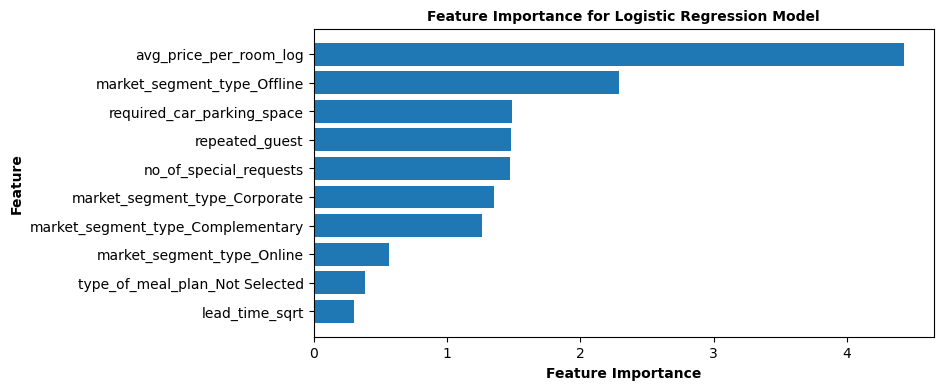

In [120]:
# Get feature importance for Logistic Regression model
feature_importance_logistic = best_model_logistic.coef_[0]

# Create DataFrame to display Feature Importance
feature_importance_df_logistic = pd.DataFrame({
    'Feature': selected_features_logistic,
    'Importance': np.abs(feature_importance_logistic)
})

# Sort the features based on importance
feature_importance_df_logistic = feature_importance_df_logistic.sort_values(by='Importance', ascending=True)

# Plot Feature Importance
plt.figure(figsize=(8, 4))
plt.barh(feature_importance_df_logistic['Feature'], feature_importance_df_logistic['Importance'])
plt.xlabel('Feature Importance', fontdict={'weight': 'bold'})
plt.ylabel('Feature', fontdict={'weight': 'bold'})
plt.title('Feature Importance for Logistic Regression Model', fontdict={'weight': 'bold', 'size': 10})
plt.show()

### 1.4.3. Random Forest

##### RFE, GridSearchCV, Model and Evaluation Metrics ( Accuracy, Precision and Recall )

In [124]:
# Recursive Feature Elimination with Random Forest
RandomForest_model = RandomForestClassifier() # Choose the model you want to use for RFE
rfe_RandomForest = RFE(RandomForest_model, n_features_to_select=10) # Choose the desired number of features
fit_RandomForest = rfe_RandomForest.fit(X_train, y_train)

# Selected features
selected_features_RandomForest = X_train.columns[fit_RandomForest.support_]
print("Selected Features:", selected_features_RandomForest)

# GridSearchCV to find the best hyperparameters
param_grid_RandomForest = {
'n_estimators': [50, 100, 200],
'max_depth': [None, 10, 20],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4]
}

RandomForest_model = RandomForestClassifier()
grid_search_RandomForest = GridSearchCV(RandomForest_model,param_grid_RandomForest, cv=5, n_jobs=-1)
grid_search_RandomForest.fit(X_train[selected_features_RandomForest], y_train)

# Best hyperparameters
best_params_RandomForest = grid_search_RandomForest.best_params_
print("Best Hyperparameters:", best_params_RandomForest)

# Train the RandomForestClassifier with optimized hyperparameters
best_model_RandomForest = RandomForestClassifier(**best_params_RandomForest)
best_model_RandomForest.fit(X_train[selected_features_RandomForest], y_train)

# Evaluate the model on the test set
y_pred_RandomForest = best_model_RandomForest.predict(X_test[selected_features_RandomForest])

# Calculate accuracy, precision and recall
accuracy_RandomForest = best_model_RandomForest.score(X_test[selected_features_RandomForest], y_test)
print("Accuracy on Test Set:", accuracy_RandomForest)
precision_RandomForest = precision_score(y_test, y_pred_RandomForest)
print("Precision:", precision_RandomForest)
recall_RandomForest = recall_score(y_test, y_pred_RandomForest)
print("Recall:", recall_RandomForest)

Selected Features: Index(['no_of_weekend_nights', 'no_of_week_nights', 'no_of_special_requests',
       'lead_time_sqrt', 'avg_price_per_room_log', 'day', 'week', 'dayofweek',
       'dayofyear', 'market_segment_type_Online'],
      dtype='object')
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy on Test Set: 0.901386748844376
Precision: 0.8873173031588873
Recall: 0.8018747337025991


#### Confusion Matrix

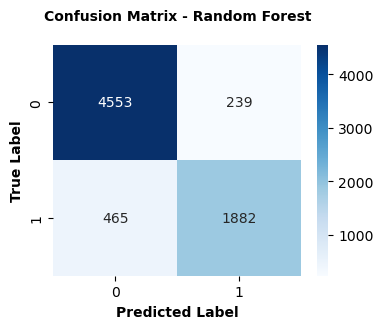

In [126]:
# Compute confusion matrix
cm_RandomForest = confusion_matrix(y_test, y_pred_RandomForest)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(cm_RandomForest, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label',fontdict={'weight': 'bold'})
plt.ylabel('True Label',fontdict={'weight': 'bold'})
plt.title('Confusion Matrix - Random Forest\n',fontdict={'weight': 'bold','size': 10})
plt.show()

#### ROC curve and ROC AUC Score

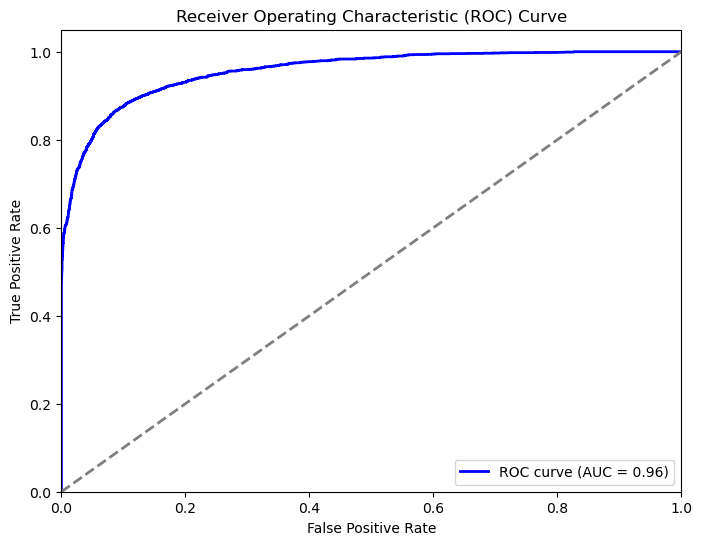

In [129]:
# Compute ROC curve and ROC AUC score
probs_RandomForest = best_model_RandomForest.predict_proba(X_test[selected_features_RandomForest])[:, 1]
fpr_RandomForest, tpr_RandomForest, thresholds_RandomForest = roc_curve(y_test,probs_RandomForest)
roc_auc_RandomForest = roc_auc_score(y_test, probs_RandomForest)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_RandomForest, tpr_RandomForest, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_RandomForest:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Feature Importance

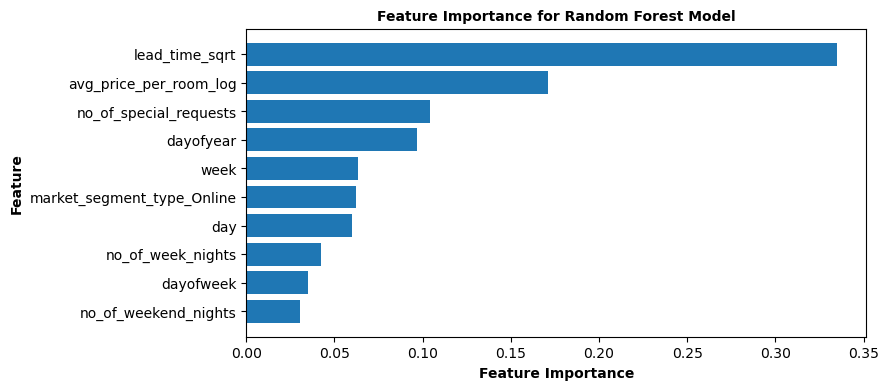

In [132]:
# Get feature importance for Random Forest model
feature_importance_randomforest = best_model_RandomForest.feature_importances_
feature_importance_df_randomforest = pd.DataFrame({'Feature':selected_features_RandomForest, 'Importance':feature_importance_randomforest})
feature_importance_df_randomforest = feature_importance_df_randomforest.sort_values(by='Importance', ascending=True)

# Plot feature importance
plt.figure(figsize=(8, 4))
plt.barh(feature_importance_df_randomforest['Feature'],feature_importance_df_randomforest['Importance'])
plt.xlabel('Feature Importance',fontdict={'weight': 'bold'})
plt.ylabel('Feature',fontdict={'weight': 'bold'})
plt.title('Feature Importance for Random Forest Model',fontdict={'weight':'bold', 'size': 10})
plt.show()

### 1.4.4. XGBoost

##### RFE, GridSearchCV, Model and Evaluation Metrics ( Accuracy, Precision and Recall )

In [136]:
# Create the XGBoost model
model_xgboost = xgb.XGBClassifier()

# Initialize RFE with the XGBoost model and the desired number of features to select
rfe_xgboost = RFE(model_xgboost, n_features_to_select=10)

# Fit the RFE to the training data
fit_xgboost = rfe_xgboost.fit(X_train, y_train)

# Selected features
selected_features_xgboost = X_train.columns[fit_xgboost.support_]
print("Selected Features:", selected_features_xgboost)

# GridSearchCV to find the best hyperparameters for XGBoost
param_grid_xgboost = {
'n_estimators': [100, 200, 300],
'max_depth': [3, 4, 5],
'learning_rate': [0.1, 0.01, 0.001],
'gamma': [0, 0.1, 0.01]
}
xgb_model = xgb.XGBClassifier()
grid_search_xgboost = GridSearchCV(xgb_model, param_grid_xgboost, cv=5,n_jobs=-1)
grid_search_xgboost.fit(X_train[selected_features_xgboost], y_train)

# Best hyperparameters
best_params_xgboost = grid_search_xgboost.best_params_
print("Best Hyperparameters:", best_params_xgboost)

# Train the XGBoost model with the selected features and best hyperparameters
selected_model_xgboost = xgb.XGBClassifier(**best_params_xgboost)
selected_model_xgboost.fit(X_train[selected_features_xgboost], y_train)

# Make predictions on the test set
y_pred_xgboost = selected_model_xgboost.predict(X_test[selected_features_xgboost])

# Calculate the accuracy,precision and recall of the model
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
print("Accuracy on Test Set:", accuracy_xgboost)
precision_xgboost = precision_score(y_test, y_pred_xgboost)
print("Precision:", precision_xgboost)
recall_xgboost = recall_score(y_test, y_pred_xgboost)
print("Recall:", recall_xgboost)

Selected Features: Index(['no_of_adults', 'required_car_parking_space', 'repeated_guest',
       'no_of_special_requests', 'lead_time_sqrt', 'avg_price_per_room_log',
       'year', 'month', 'market_segment_type_Offline',
       'market_segment_type_Online'],
      dtype='object')
Best Hyperparameters: {'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Accuracy on Test Set: 0.8873791847597703
Precision: 0.8623767026773133
Recall: 0.7822752449936089


#### Confusion Matrix

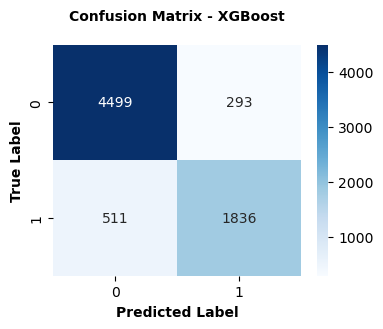

In [138]:
# Compute confusion matrix
cm_xgboost = confusion_matrix(y_test, y_pred_xgboost)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(cm_xgboost, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label',fontdict={'weight': 'bold'})
plt.ylabel('True Label',fontdict={'weight': 'bold'})
plt.title('Confusion Matrix - XGBoost\n',fontdict={'weight': 'bold', 'size':10})
plt.show()

#### ROC curve and ROC AUC Score

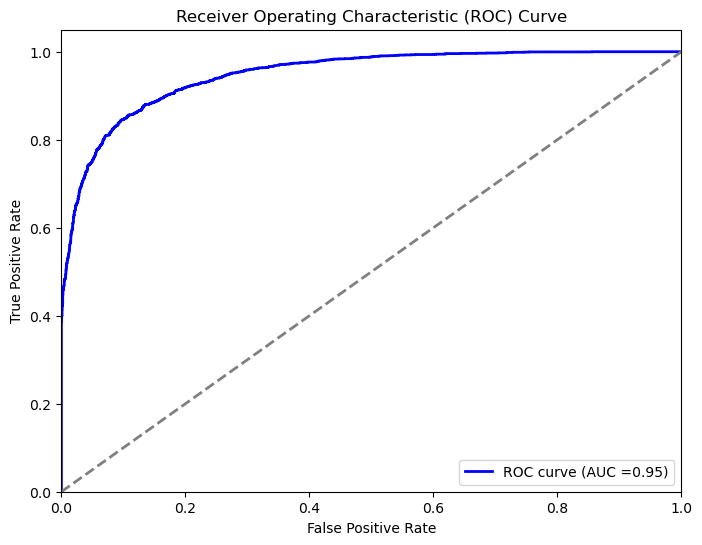

In [141]:
# Compute ROC curve and ROC AUC score
probs_xgboost = selected_model_xgboost.predict_proba(X_test[selected_features_xgboost])[:, 1]
fpr_xgboost, tpr_xgboost, thresholds_xgboost = roc_curve(y_test, probs_xgboost)
roc_auc_xgboost = roc_auc_score(y_test, probs_xgboost)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgboost, tpr_xgboost, color='blue', lw=2, label=f'ROC curve (AUC ={roc_auc_xgboost:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Feature Importance

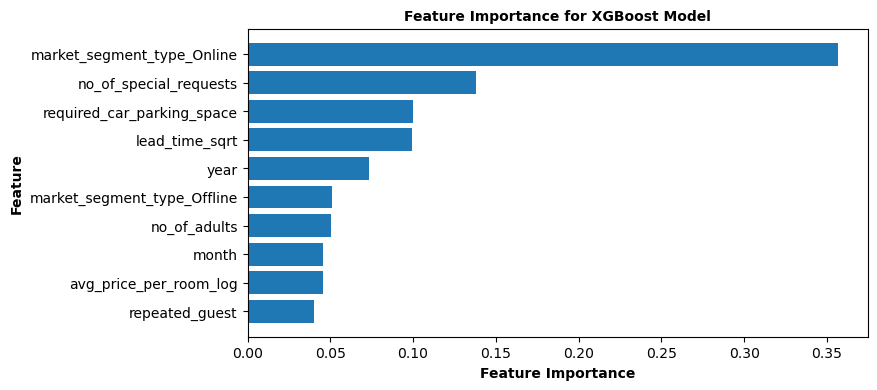

In [144]:
# Show feature importance for XGBoost model
feature_importance = selected_model_xgboost.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': selected_features_xgboost,'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance',ascending=True)

# Plot feature importance
plt.figure(figsize=(8, 4))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance',fontdict={'weight': 'bold'})
plt.ylabel('Feature',fontdict={'weight': 'bold'})
plt.title('Feature Importance for XGBoost Model',fontdict={'weight': 'bold','size': 10})
plt.show()